In [1]:
from hrmpython import HRM
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load CSV file
df = pd.read_csv('./Sample-HRM-p50-genotyping.csv')

/home/satrio/miniconda3/envs/api_devel/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0, 0.5, 'Raw Intensity')

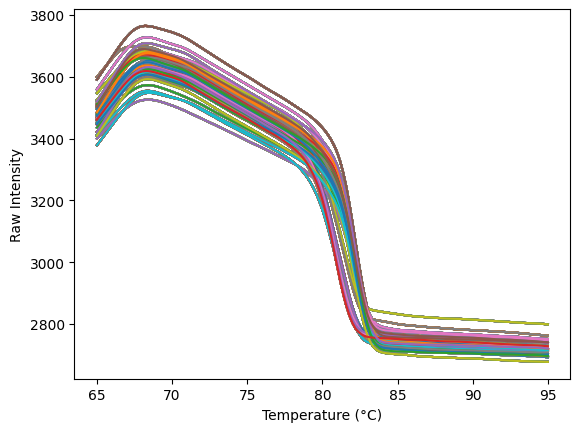

In [3]:
# Init HRM class
hrm = HRM(df)

# Get temperature df
hrm.temp

# Get data df
hrm.data

data = hrm.data

for i in range(len(data.columns)):
    column = data.columns[i]
    plt.plot(hrm.temp, hrm.data)

plt.xlabel('Temperature (°C)')
plt.ylabel('Raw Intensity') 

Text(0, 0.5, 'RFU')

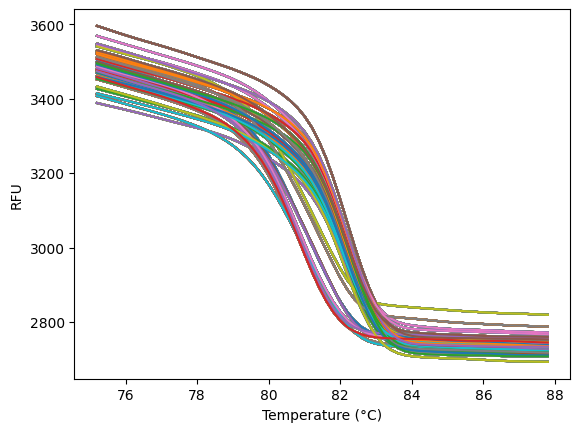

In [4]:
# Subset data
hrm.subset((75,88))
data = hrm.data

for i in range(len(data.columns)):
    column = data.columns[i]
    plt.plot(hrm.temp, hrm.data)

plt.xlabel('Temperature (°C)')
plt.ylabel('RFU') 

In [5]:
# Get clustering for each column
hrm.cluster

# Change clustering settings, default is kmeans with n=2 (2 group)
# Available method KMeans, Agglomerative, and DBSCAN
hrm.clustering('dbscan', 3)
hrm.clustering('agglomerative', 3)
hrm.clustering('kmeans', 3)

palette = ['red', 'blue', 'green']

/home/satrio/miniconda3/envs/api_devel/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0, 0.5, 'Normalised RFU')

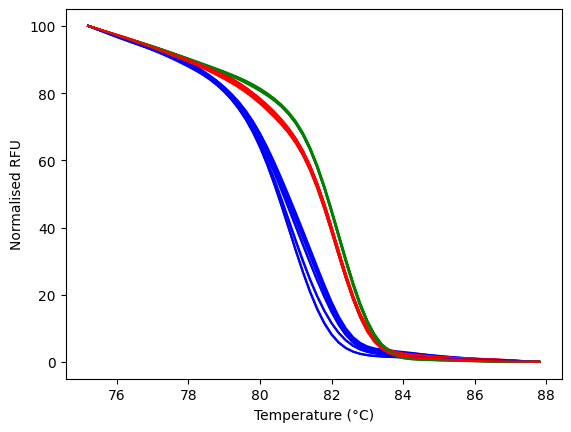

In [6]:
# Get normalised data
data = hrm.normal()

for i in range(len(data.columns)):
    column = data.columns[i]
    plt.plot(hrm.temp, data[column], color=palette[hrm.cluster[i]])

plt.xlabel('Temperature (°C)')
plt.ylabel('Normalised RFU')

Text(0, 0.5, '-d(norm RFU)/dT')

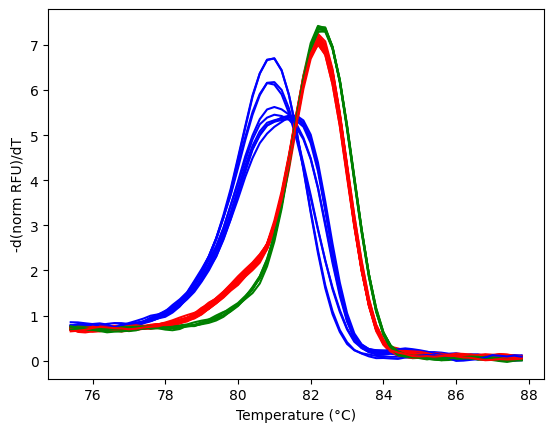

In [7]:
# Get delta or difference
data = hrm.diff()

for i in range(len(data.columns)):
    column = data.columns[i]
    plt.plot(hrm.temp, data[column], color=palette[hrm.cluster[i]])

plt.xlabel('Temperature (°C)')
plt.ylabel('-d(norm RFU)/dT') 

In [8]:
# Get melting temperature (Tm)
hrm.tm()

,Sample,Temperature
0,G6,81.0
1,G7,82.2
2,G8,82.2
3,G9,82.2
4,G10,82.2
5,G11,81.4
6,G12,82.2
7,G13,80.8
8,G14,81.4
9,H6,81.0


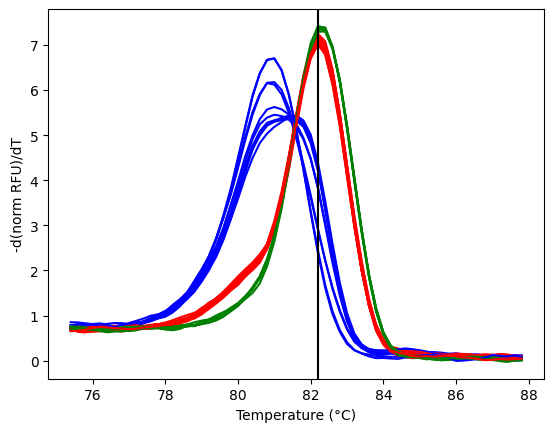

In [9]:
# Plot Tm value as line
data = hrm.diff()

for i in range(len(data.columns)):
    column = data.columns[i]
    plt.plot(hrm.temp, data[column], color=palette[hrm.cluster[i]])

plt.xlabel('Temperature (°C)')
plt.ylabel('-d(norm RFU)/dT') 
plt.axvline(x = 82.2, color = 'black', label = 'J14 Tm')

Text(0, 0.5, 'Difference RFU')

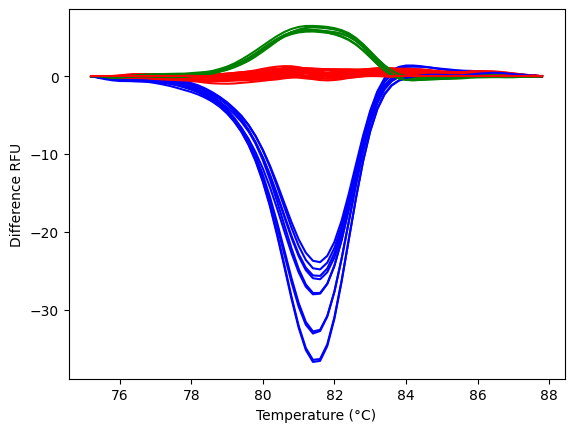

In [10]:
# Get substracted data against reference
data = hrm.sub('J14')

for i in range(len(data.columns)):
    column = data.columns[i]
    plt.plot(hrm.temp, data[column], color=palette[hrm.cluster[i]])

plt.xlabel('Temperature (°C)')
plt.ylabel('Difference RFU')

In [11]:
# Reshape data
reshape = hrm.reshape(hrm.sub('J14'))
reshape

,Temperature,Sample,Intensity,Cluster
0,75.2,G6,0.000000,1
1,75.4,G6,-0.077928,1
2,75.6,G6,-0.140492,1
3,75.8,G6,-0.183937,1
4,76.0,G6,-0.199900,1
...,...,...,...,...
2299,87.0,J14,0.000000,0
2300,87.2,J14,0.000000,0
2301,87.4,J14,0.000000,0
2302,87.6,J14,0.000000,0


In [12]:
# Create interactive plot
import plotly.express as px

fig = px.line(reshape, x='Temperature', y='Intensity', line_group="Sample", title="HRM Interactive Figure", color='Cluster')
fig.show()